<a href="https://colab.research.google.com/github/kunalnischal7/CustomerChurnPrediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [33]:
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

## Mount Google Drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [35]:
file_path = '/content/drive/My Drive/customer_churn_large_dataset.xlsx'

In [36]:
df = pd.read_excel(file_path)

In [37]:
print(df.head())

   CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0  


# Data Preparation

### Data Shuffling

In [38]:
from sklearn.utils import shuffle
df = shuffle(df, random_state = 44)

## Data Preparation as X and Y

In [39]:
X = df.drop('Churn', axis=1)
X

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
39574,39575,Customer_39575,38,Female,Los Angeles,10,44.22,354
537,538,Customer_538,52,Female,Los Angeles,14,33.07,217
99246,99247,Customer_99247,64,Female,Los Angeles,9,52.19,494
39498,39499,Customer_39499,66,Female,Chicago,23,48.19,353
24797,24798,Customer_24798,48,Female,Miami,20,77.13,281
...,...,...,...,...,...,...,...,...
53123,53124,Customer_53124,55,Female,New York,18,71.37,415
49723,49724,Customer_49724,70,Male,Chicago,17,78.27,57
25773,25774,Customer_25774,42,Female,New York,12,58.16,316
69027,69028,Customer_69028,28,Male,Miami,19,31.83,341


## Feature Selection

Text(0.5, 1.0, 'gender and location')

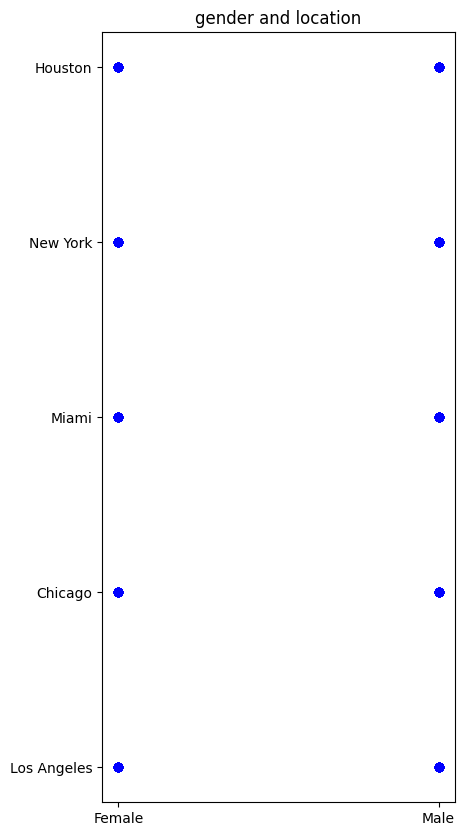

In [40]:
alpha = 0.02
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.scatter(df.Gender, df.Location, color = 'blue', alpha=alpha)
plt.title('gender and location')

## One Hot Encoding

In [41]:
encoded_df = pd.get_dummies(df, columns=['Location' , 'Gender'])


In [42]:
encoded_df

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
39574,39575,Customer_39575,38,10,44.22,354,0,0,0,1,0,0,1,0
537,538,Customer_538,52,14,33.07,217,0,0,0,1,0,0,1,0
99246,99247,Customer_99247,64,9,52.19,494,1,0,0,1,0,0,1,0
39498,39499,Customer_39499,66,23,48.19,353,0,1,0,0,0,0,1,0
24797,24798,Customer_24798,48,20,77.13,281,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,53124,Customer_53124,55,18,71.37,415,0,0,0,0,0,1,1,0
49723,49724,Customer_49724,70,17,78.27,57,1,1,0,0,0,0,0,1
25773,25774,Customer_25774,42,12,58.16,316,0,0,0,0,0,1,1,0
69027,69028,Customer_69028,28,19,31.83,341,1,0,0,0,1,0,0,1


In [43]:
df_new = encoded_df.drop('CustomerID', axis=1)

print(df)


       CustomerID            Name  Age  Gender     Location  \
39574       39575  Customer_39575   38  Female  Los Angeles   
537           538    Customer_538   52  Female  Los Angeles   
99246       99247  Customer_99247   64  Female  Los Angeles   
39498       39499  Customer_39499   66  Female      Chicago   
24797       24798  Customer_24798   48  Female        Miami   
...           ...             ...  ...     ...          ...   
53123       53124  Customer_53124   55  Female     New York   
49723       49724  Customer_49724   70    Male      Chicago   
25773       25774  Customer_25774   42  Female     New York   
69027       69028  Customer_69028   28    Male        Miami   
14100       14101  Customer_14101   42  Female     New York   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
39574                          10         44.22             354      0  
537                            14         33.07             217      0  
99246                   

In [44]:
dfnew = df_new.drop('Name', axis=1)
dfnew

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
39574,38,10,44.22,354,0,0,0,1,0,0,1,0
537,52,14,33.07,217,0,0,0,1,0,0,1,0
99246,64,9,52.19,494,1,0,0,1,0,0,1,0
39498,66,23,48.19,353,0,1,0,0,0,0,1,0
24797,48,20,77.13,281,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53123,55,18,71.37,415,0,0,0,0,0,1,1,0
49723,70,17,78.27,57,1,1,0,0,0,0,0,1
25773,42,12,58.16,316,0,0,0,0,0,1,1,0
69027,28,19,31.83,341,1,0,0,0,1,0,0,1


## Preparing Data as X and Y after encoding

In [45]:
y = dfnew ['Churn']
y

39574    0
537      0
99246    1
39498    0
24797    1
        ..
53123    0
49723    1
25773    0
69027    1
14100    1
Name: Churn, Length: 100000, dtype: int64

In [46]:
X = dfnew

### Histograms to check for outliers, missing data and duplicate data

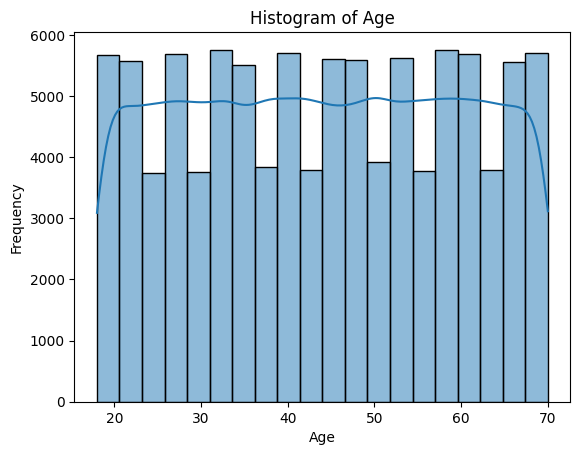

In [47]:
import seaborn as sns

feature_to_plot = 'Age'
sns.histplot(dfnew[feature_to_plot], bins=20, kde=True)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()

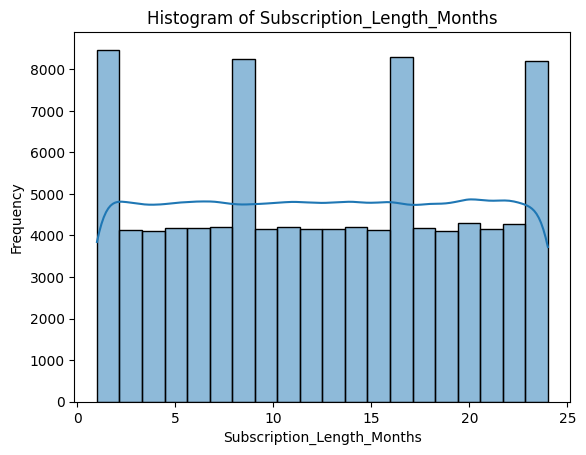

In [48]:
feature_to_plot = 'Subscription_Length_Months'
sns.histplot(dfnew[feature_to_plot], bins=20, kde=True)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()

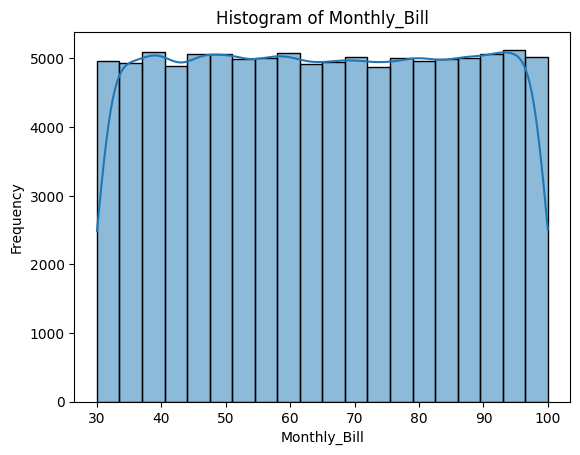

In [49]:
feature_to_plot = 'Monthly_Bill'
sns.histplot(dfnew[feature_to_plot], bins=20, kde=True)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()

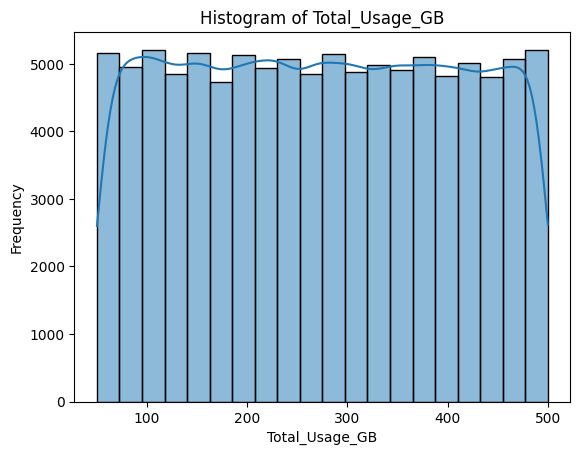

In [50]:
feature_to_plot = 'Total_Usage_GB'
sns.histplot(dfnew[feature_to_plot], bins=20, kde=True)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()

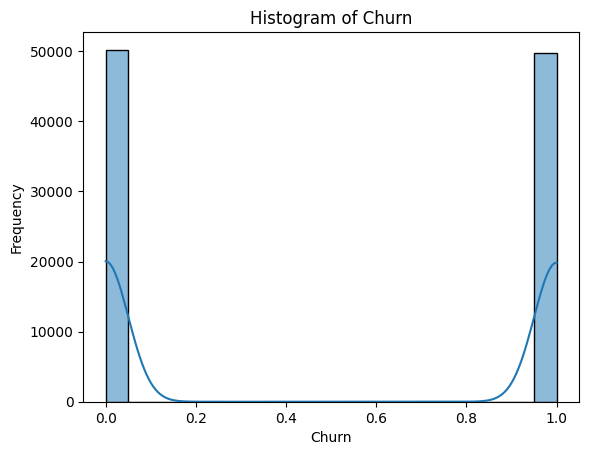

In [51]:
feature_to_plot = 'Churn'
sns.histplot(dfnew[feature_to_plot], bins=20, kde=True)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.show()

# Model Building

## Training the model

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

## Applying the model to make a prediction

In [55]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

## Evaluating Model Performance

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_rf_train_pred)


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_rf_train_pred)
recall = recall_score(y_train, y_rf_train_pred)
f1 = f1_score(y_train, y_rf_train_pred)

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_rf_train_pred)
